# Unzip data

In [1]:
import zipfile

with zipfile.ZipFile('./AI_Human.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('./AI_Human.csv')

# Import data

<Axes: xlabel='generated', ylabel='count'>

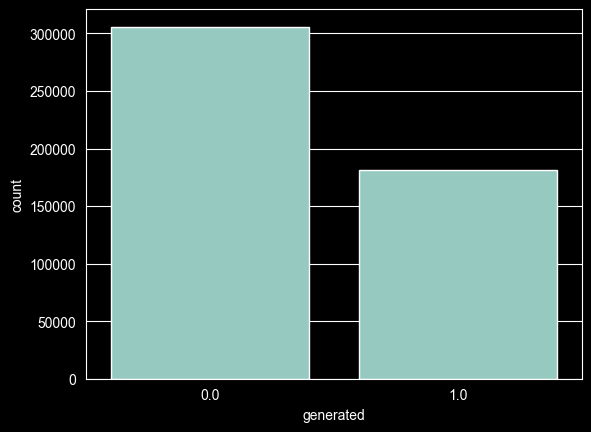

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
import seaborn as sb
from utils import TextProcessor

processor = TextProcessor()

training_data = pd.read_csv('./AI_Human.csv/AI_Human.csv')

sb.countplot(data=training_data, x='generated')

# Clean data

In [ ]:
training_data['text'] = training_data['text'].apply(processor.full_clean)

# Test model

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

y = training_data['generated']
X = training_data['text']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=69)

pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),  # Step 1: CountVectorizer
    ('tfidf_transformer', TfidfTransformer()),  # Step 2: TF-IDF Transformer
    ('naive_bayes', MultinomialNB())])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     91856
         1.0       0.98      0.90      0.94     54315

    accuracy                           0.96    146171
   macro avg       0.96      0.94      0.95    146171
weighted avg       0.96      0.96      0.96    146171



# Save model

In [17]:
import joblib

joblib.dump(pipeline, 'ai-text-detector-model.pkl')

['ai-text-detector-model.pkl']